# Univariate Linear Regression Programming Excercise
In this exercise we will try to accomplish a linear regression using only one variable of the dataset used.

Let's start by importing some libraries that we will use:

In [1]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

## Linear Regression with one variable
In a linear regression with only one variable, the hypothesis function can be written as:
$$h_\theta(x)=\theta_0x_0+\theta_1x_1 = \theta_0+\theta_1x_1$$
where the last equality is due to the fact that $x_0$ is chosen to be 1 by convention.

Let's parse our dataset and let's show its dimensions:

In [2]:
data = np.loadtxt('data/ex1data1.txt', delimiter=',')
print("The dimension of the dataset is {}".format(data.shape))

The dimension of the dataset is (97, 2)


Let's now add a column of 1 to our training features and let's treat the target feature as a separate variable:

In [3]:
x = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

Let's plot the dataset:

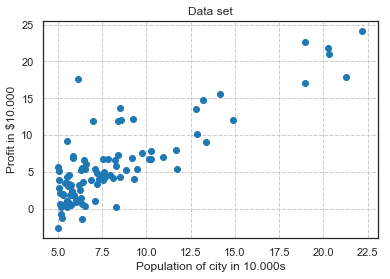

In [4]:
plt.scatter(x[:,1],y)
plt.title('Data set')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000')
plt.grid(linestyle="--")

## Cost function
A cost function has to be used to track how the training phase is going. This is what we will consider our metric of goodness. The cost function has the following form:
$$J(\theta) = \dfrac{1}{2m}\sum_{j=1}^{m}(h_\theta(x^{(j)})-y^{(j)})^2$$
where:
- $h_\theta(x^{(j)})$ represents the prediction that our model does
- $y^{(j)}$ is the true value. In the best case, we'd like our model to predict this value
- $m$ is the number of sample at our disposal in the training set

In [5]:
def calculate_cost(x, y, theta = [[0],[0]]):
    h = x.dot(theta)
    return 1/(2 * data.shape[0]) * np.sum(np.square(h - y))

(4, 23)

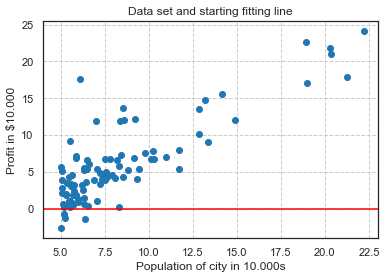

In [6]:
theta = [[0],[0]]
plt.scatter(x[:,1],y)
plt.plot(np.arange(0, 24) * theta[1] + theta[0], 'r')
plt.title('Data set and starting fitting line')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000')
plt.grid(linestyle="--")
plt.xlim(4, 23)

In the graph above, the red line represent the line representing the parameters vector (having both the intercept and the angular coefficient set to 0). **Our model is not trained yet, so it doesn't follow the data**.

## Batch Gradient Descent
Let's use the *batch gradient descent*, wich uses the whole training set to predict the parameters that approximate the data in the best possible way. The problem with this approach is that it becomes slower as the dataset becomes bigger. For this reason, it is best to use this approach only with small training sets.

Since we're trying to reduce the cost function, we will consider the gradient of this function, which can be written in two version:
- Scalar version
- Vectorized version

### Gradient function
#### Scalar version
$$\dfrac{\partial J}{\partial \theta_i} = \dfrac{1}{m}(h_{\theta}x^{(i)}-y^{(i)})x^{(i)}$$
#### Vectorized version
$$\dfrac{\partial J}{\partial \theta}(\theta) = \dfrac{1}{m} x^T(x\theta - y)$$
### Gradient descent
The gradient just introduced has to be used in a method (an iterative one). We will implement an algorithm that uses the following formula:
$$\theta^{(k)} = \theta^{(k-1)} - \dfrac{\alpha}{m} \dfrac{\partial J}{\partial \theta_i}(\theta^{(k)})$$
At each itearation, the current estimatate of the parameters gets updated using the last estimate and a term that depends on a learning rate $\alpha$ and the gradient value.

In [7]:
iterations_to_do = 1500
initial_cost = calculate_cost(x, y)
costs = [initial_cost]

In [8]:
def gradient_descent(x, y, alpha = .1, theta=[[0],[0]], iterations = 1500):
    for i in range(0, iterations):
        theta = theta - (alpha / data.shape[0]) * (x.T).dot(x.dot(theta) - y)
        costs.append(calculate_cost(x, y, theta))
    return theta

In [9]:
final_theta = gradient_descent(x, y, alpha = .01, 
        theta=[[0],[0]], iterations = iterations_to_do)

print("The estimated parameters that fit our date are: \n{}"
      .format(final_theta))

The estimated parameters that fit our date are: 
[[-3.63029144]
 [ 1.16636235]]


## Final results
Let's now plot our dataset and let's see how our trained model fits the data: 

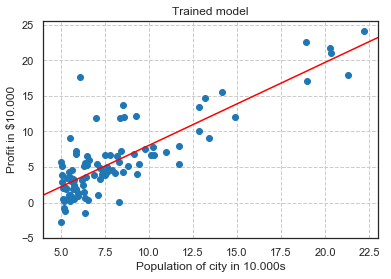

In [10]:
plt.scatter(x[:,1],y)
plt.plot(np.arange(0, 24) * final_theta[1] + final_theta[0], 'r')
plt.title('Trained model')
plt.xlabel('Population of city in 10.000s')
plt.ylabel('Profit in $10.000')
plt.xlim(4,23)
plt.grid(linestyle='--')

It is now possible to see the line that we can use to do predictions. It is the best (linear) line possible that approximate the sample in the training set used. In fact, this is the best line which reduces the cost function at a minimum value, as we will see in the next section.
### Errors
We can see how the error is affected when the parameters change. Let's first see the differences between the first and the last iteration.
#### First iteration

In [11]:
print("The error at the first iteration is: {}"
      .format(initial_cost))

The error at the first iteration is: 32.072733877455676


#### Last iteration

In [12]:
print("The error at the last iteration is: {}"
      .format(calculate_cost(x, y, final_theta)))

The error at the last iteration is: 4.483388256587725


#### Overall cost on different iteration
Even if the differences between the cost is explanatory, we usually want to see how the gradient descent affects the parameters vector and how the cost behaves at each iteration. Let's plot this behaviour:

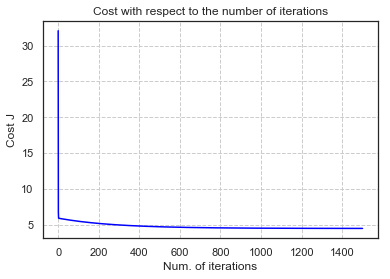

In [13]:
plt.plot(np.arange(0, iterations_to_do + 1, 1), costs, 'b')
plt.title('Cost with respect to the number of iterations')
plt.xlabel('Num. of iterations')
plt.ylabel('Cost J')
plt.grid(linestyle='--')

## Prediction from learned parameters
Let's use the parameters found to predict:
1. The profit for a population of 3.5k people
2. The profit for a population of 7k people

The prediction is done by using the hypothesis function, which is, in a vectorized version:
$$h_\theta(x)=\theta^Tx$$

In [14]:
print("The profit for a population of 3.5k people is: {} $"
      .format(final_theta.T.dot([1, 3.5])*10000))
print("The profit for a population of 7k people is: {} $"
      .format(final_theta.T.dot([1, 7])*10000))

The profit for a population of 3.5k people is: [4519.7678677] $
The profit for a population of 7k people is: [45342.45012945] $


## Show if the optimization has gone right
In order to see if the optimization of the cost function worked, we can use a contour plot of the cost function with respect to the the parameters in the $\theta$ vector.

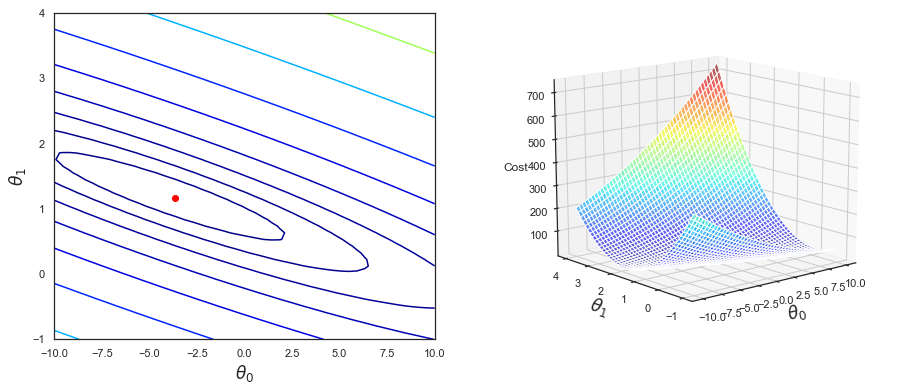

In [15]:
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = calculate_cost(x,y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(final_theta[0],final_theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

In the left image the red dot represents the parameters found using the gradient descent algorithm. It is possible to see that it is near the center of the smaller ellipsis, which represent the zone where the cost function value is the smallest. 

In the right image, it is possible to see a 3D plot of the cost function.